In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import re

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\gky16/nltk_data'
    - 'C:\\Users\\gky16\\anaconda3\\nltk_data'
    - 'C:\\Users\\gky16\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\gky16\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\gky16\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
df = pd.read_csv("amazon_alexa.tsv" , sep = '\t')
df.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

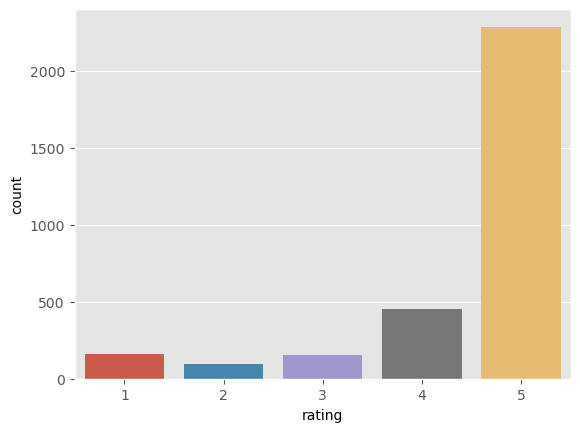

In [6]:
sns.countplot( x = 'rating', data = df)

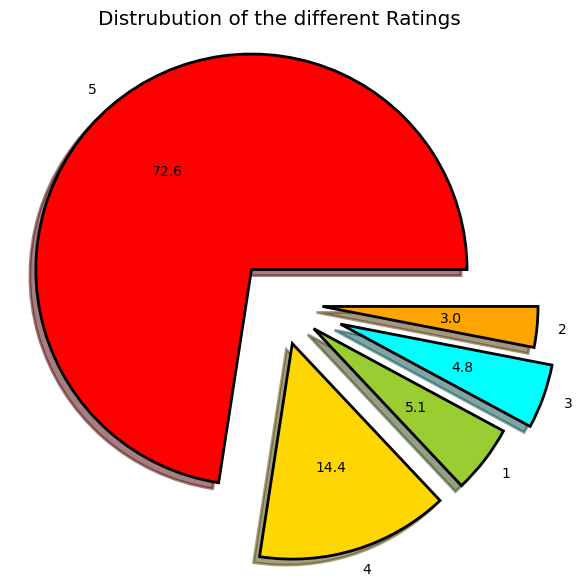

In [7]:
fig = plt.figure(figsize = (7,7))
colors = ('red', 'gold','yellowgreen','cyan','orange')
wp = {'linewidth': 2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.2,0.2,0.2,0.3,0.2)
tags.plot(kind ='pie', autopct = '%1.1f',colors = colors, shadow = True,
          startangle =0, wedgeprops =wp, explode = explode, label ='')
plt.title('Distrubution of the different Ratings')
plt.show()

<Axes: xlabel='variation', ylabel='count'>

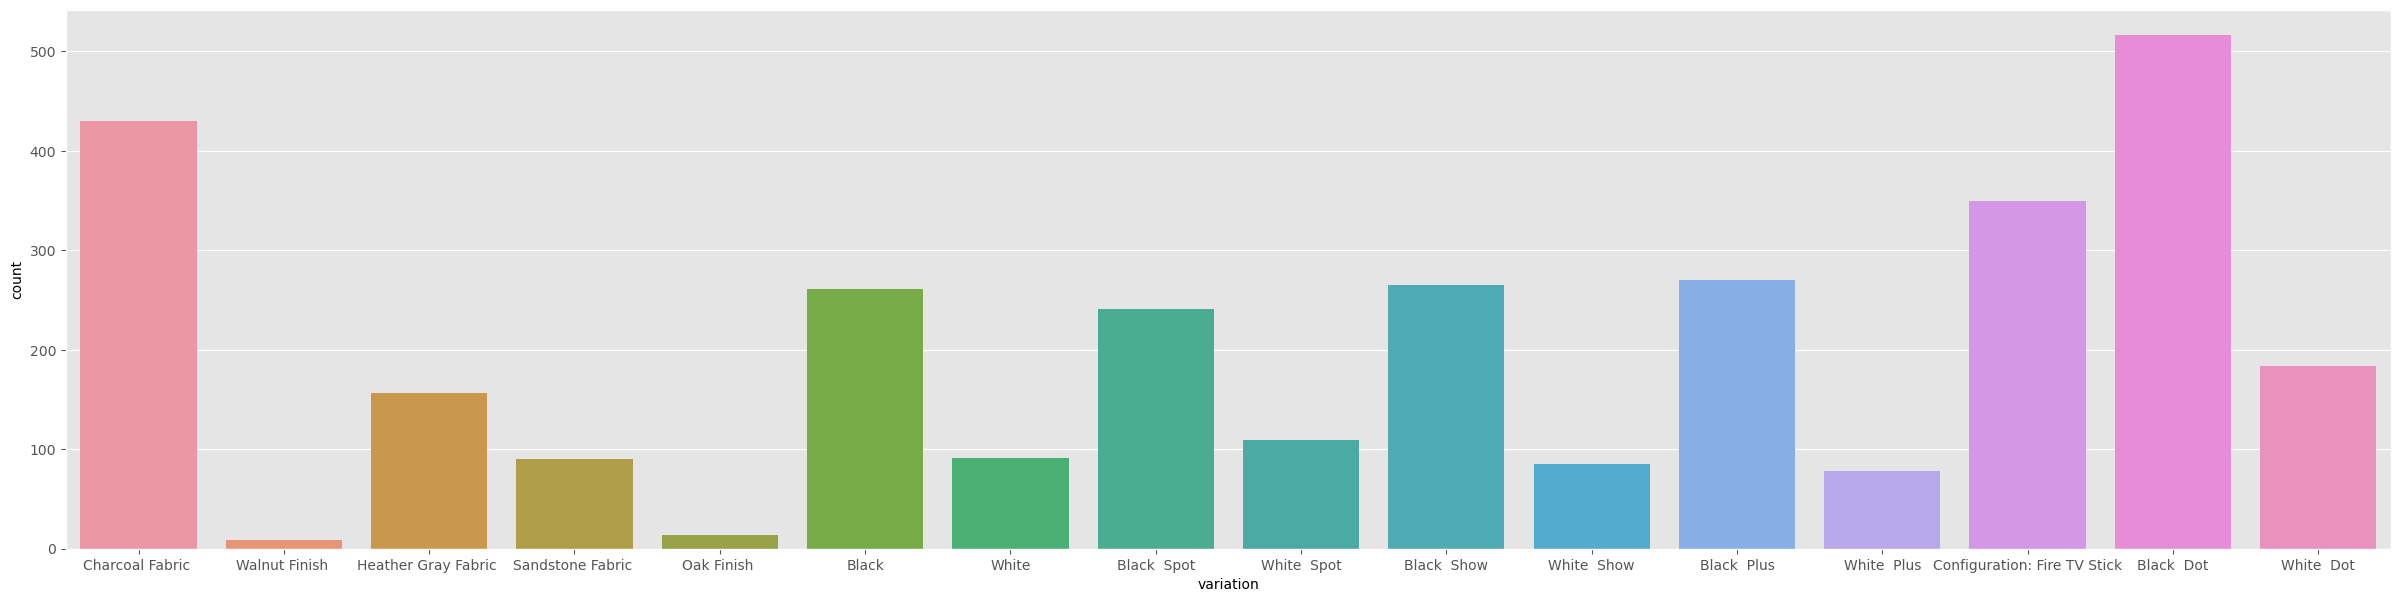

In [8]:
fig = plt.figure(figsize = (30,7))
sns.countplot(x='variation', data = df)

In [9]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

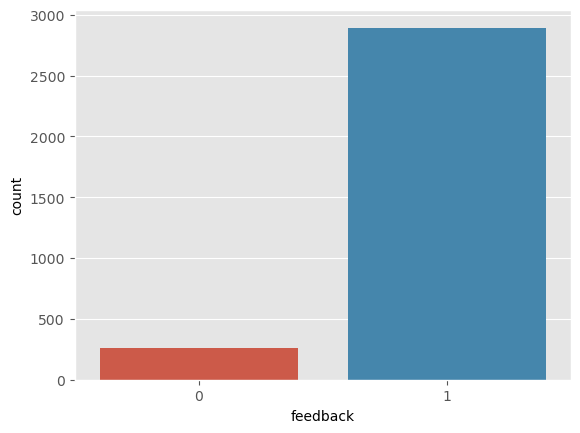

In [10]:
sns.countplot(x='feedback', data =df)
plt.show()

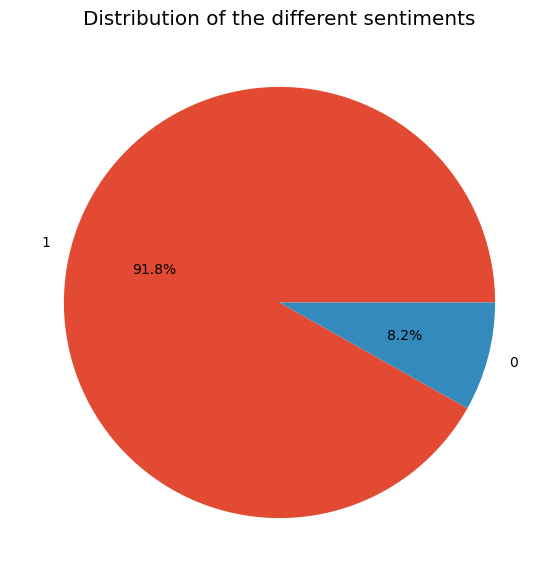

In [11]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [12]:

for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [13]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+www\S+|https\S+", '', text, flags= re.MULTILINE)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [14]:
import nltk
nltk.download('punkt')
df.verified_reviews = df['verified_reviews'].apply(data_processing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gky16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'stop_words' is not defined

In [15]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [17]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [18]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

NameError: name 'WordCloud' is not defined

<Figure size 2000x1500 with 0 Axes>

In [20]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
